In [15]:
# Functional Imports
import pandas as pd
import numpy as np

# Auto-completion Config
%config IPCompleter.greedy=True

# Creating DataFrame from csv
data = pd.read_csv('data/titanic3.csv')

In [16]:
# Verifying import
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [17]:
# Swap garbage input for NaN values that NumPy can read
data.replace('?', np.nan, inplace= True)

# Convert numbers that were pulled in as strings to ints and floats
data = data.astype({"age": np.float64, "fare": np.float64})

<Axes: xlabel='survived', ylabel='fare'>

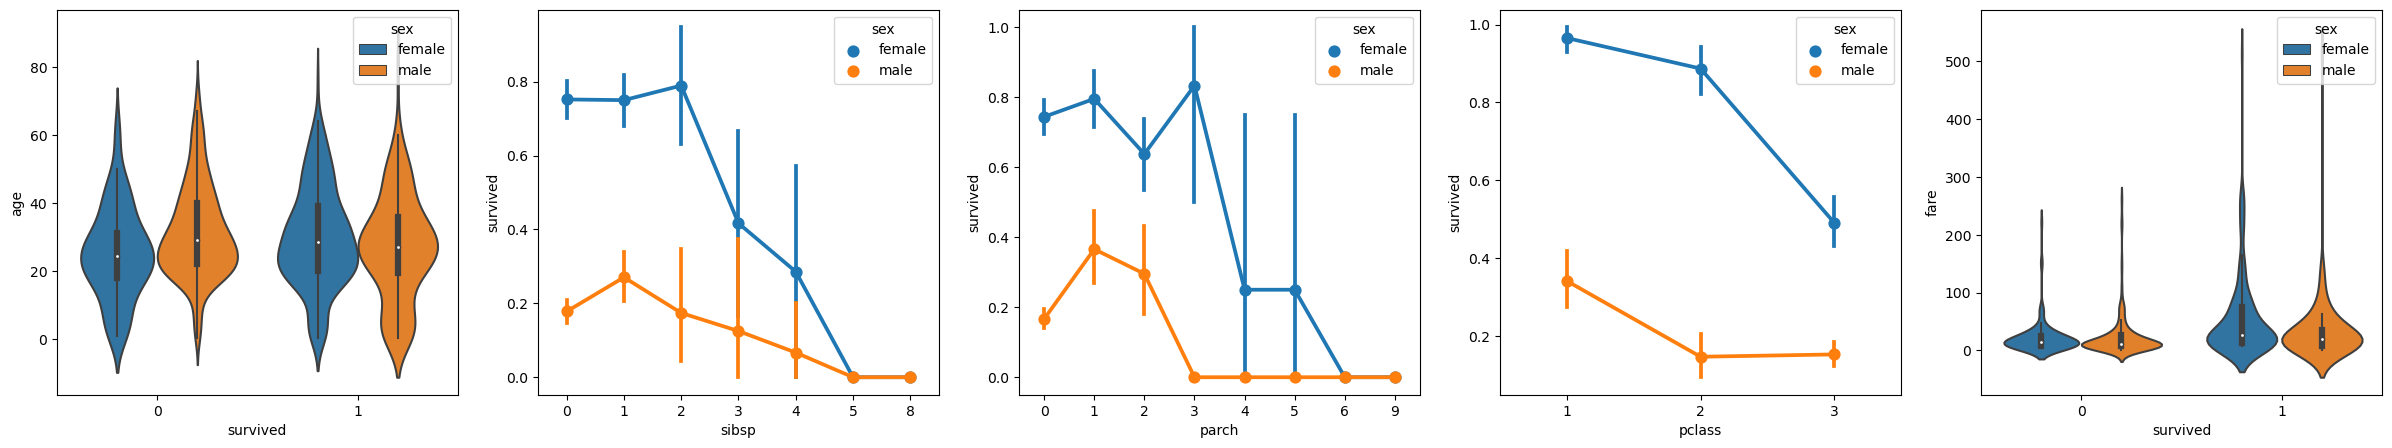

In [18]:
# EDA Plots
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=5, figsize=(30,5))
sns.violinplot(x="survived", y="age", hue="sex", data=data, ax=axs[0])
sns.pointplot(x="sibsp", y="survived", hue="sex", data=data, ax=axs[1])
sns.pointplot(x="parch", y="survived", hue="sex", data=data, ax=axs[2])
sns.pointplot(x="pclass", y="survived", hue="sex", data=data, ax=axs[3])
sns.violinplot(x="survived", y="fare", hue="sex", data=data, ax=axs[4])

In [19]:
# Swap male / female to integer values that facilate numerical analysis 
data.replace({'male': 1, 'female': 0}, inplace=True)

In [20]:
# Find the correlation of the numeric / boolean values to survival
data.corr(numeric_only = True).abs()[["survived"]]

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055512
sibsp,0.027825
parch,0.082660
fare,0.244265
body,NaN


In [21]:
# Combine sibsp and parch into a single variable 
data["relatives"] = data.apply (lambda row: int((row['sibsp'] + row['parch']) > 0), axis=1)

# Re-correlate the numerical data now given this new feature
data.corr(numeric_only = True).abs()[['survived']]

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055512
sibsp,0.027825
parch,0.082660
fare,0.244265
body,NaN
relatives,0.201719


In [22]:
# Dropping non-numeric data so it can be processed
data = data[['sex', 'pclass','age','relatives','fare','survived']].dropna()
data.head()

,sex,pclass,age,relatives,fare,survived
0,0,1,29.00,0,211.3375,1
1,1,1,0.92,1,151.5500,1
2,0,1,2.00,1,151.5500,0
3,1,1,30.00,1,151.5500,0
4,0,1,25.00,1,151.5500,0


In [23]:
# Use Sklearn to split clean and prepped data into train and test data sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data[['sex','pclass','age','relatives','fare']], data.survived, test_size=0.2, random_state=0)

In [24]:
# Normalize the data across all attributes
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [25]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [26]:
from sklearn import metrics
predict_test = model.predict(X_test)
print(metrics.accuracy_score(y_test, predict_test))

0.7464114832535885


In [27]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()    # https://keras.io/guides/sequential_model/

2023-09-18 21:47:22.019555: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2023-09-18 21:47:25.390631: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [29]:
model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu', input_dim = 5))
model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))
model.summary()

# The first layer will be set to have a dimension of 5, since you have five inputs: sex, pclass, age, relatives, and fare.
# The last layer must output 1, since you want a 1-dimensional output indicating whether a passenger would survive.
# The middle layer was kept at 5 for simplicity, although that value could have been different.
# ----
# The rectified linear unit (relu) activation function is used as a good general activation function for the first two layers, 
# while the sigmoid activation function is required for the final layer as the output you want 
# (of whether a passenger survives or not) needs to be scaled in the range of 0-1 
# (the probability of a passenger surviving).

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 30        
                                                                 
 dense_1 (Dense)             (None, 5)                 30        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
 dense_3 (Dense)             (None, 5)                 10        
                                                                 
 dense_4 (Dense)             (None, 5)                 30        
                                                                 
 dense_5 (Dense)             (None, 1)                 6         
                                                                 
Total params: 112
Trainable params: 112
Non-trainable pa

In [30]:
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32, epochs=50)

Epoch 1/50
27/27 [==============================] - 2s 12ms/step - loss: 0.6925 - accuracy: 0.5742
Epoch 2/50
27/27 [==============================] - 0s 13ms/step - loss: 0.6911 - accuracy: 0.5861
Epoch 3/50
27/27 [==============================] - 0s 13ms/step - loss: 0.6897 - accuracy: 0.5861
Epoch 4/50
27/27 [==============================] - 0s 14ms/step - loss: 0.6883 - accuracy: 0.5861
Epoch 5/50
27/27 [==============================] - 0s 16ms/step - loss: 0.6870 - accuracy: 0.5861
Epoch 6/50
27/27 [==============================] - 0s 13ms/step - loss: 0.6855 - accuracy: 0.5861
Epoch 7/50
27/27 [==============================] - 0s 12ms/step - loss: 0.6843 - accuracy: 0.5861
Epoch 8/50
27/27 [==============================] - 0s 16ms/step - loss: 0.6832 - accuracy: 0.5861
Epoch 9/50
27/27 [==============================] - 0s 15ms/step - loss: 0.6822 - accuracy: 0.5861
Epoch 10/50
27/27 [==============================] - 0s 13ms/step - loss: 0.6808 - accuracy: 0.5861
Epoch 11/

In [31]:
y_pred = np.rint(model.predict(X_test).flatten())
print(metrics.accuracy_score(y_test, y_pred))

7/7 [==============================] - 0s 9ms/step
0.7942583732057417
